In [2]:
# !pip install autograd
import pandas as pd
import autograd.numpy as np
from autograd import grad 

In [3]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
train_df = pd.read_csv(datasets["train"])
test_df = pd.read_csv(datasets["test"])
attribute_names = list(train_df)[:-1]

In [268]:
genre_histograms = {
    "edm":       np.asarray([1, 0, 0, 0, 0, 0, 0]),
    "hiphop":    np.asarray([0, 1, 0, 0, 0, 0, 0]),
    "classical": np.asarray([0, 0, 1, 0, 0, 0, 0]),
    "jazz":      np.asarray([0, 0, 0, 1, 0, 0, 0]),
    "pop":       np.asarray([0, 0, 0, 0, 1, 0, 0]),
    "country":   np.asarray([0, 0, 0, 0, 0, 1, 0]),
    "rock":      np.asarray([0, 0, 0, 0, 0, 0, 1])
}

In [175]:
# Split test and training into x and y values
x_train = train_df[attribute_names]
y_train = train_df["Class"]
x_test = test_df[attribute_names]
y_test = test_df["Class"]

x = x_train
y = y_train
x = x.values
y = y.values

[Jerm Watt Github Code Reference](https://github.com/jermwatt/mlrefined/blob/cfda70dacd14a5010a4a71a41b46f3a1ac9f1774/mlrefined_libraries/superlearn_library/cost_viewer_entropy.py)

In [ ]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)
        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history
 
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

## TO DO:
    - get misclassifications (fusion rule)

In [277]:
# old implementation, must be fixed
def get_misclassifications(minweight):
    a = model(x, minweight)
    length = np.size(a)
    errors = 0
    for i in range(length):
        if y[0][i] == 1 and a[i] < 0:
            errors = errors + 1
        elif y[0][i] == -1 and a[i] >= 0:
            errors = errors + 1
    return errors

In [203]:
# look at chapter 6, page 10
y_encoded = np.array([genre_histograms[genre] for genre in y])
epsilon = 1e-5
def cross_entropy(w):
    c = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]
        a_p = sigmoid(model(x_p, w))
        
        c -= np.sum(y_p*np.log(a_p) + (1-y_p)*np.log(1 - a_p))
    return c/y.size 

In [217]:
# this function does not work
def cross_entropy2(w):
    cost = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]
        a_p = sigmoid(model(x_p, w))
        
        ind = np.argwhere(y_p == 0)
        cost = -np.sum(np.log(1 - a_p[ind] + epsilon))

        ind = np.argwhere(y_p == 1)
        cost -= np.sum(np.log(a_p[ind] + epsilon))
    return cost/y.size


In [195]:
def entropy(w):
    cost = 0.0
    for p in range(len(y)):
        x_p = x[p]
        y_p = y_encoded[p]

        output = sigmoid(model(x_p, w))
        # print(output)

        difference = y_p - output
        cost += np.sum(np.abs(difference))

    return cost / np.size(y)

In [219]:
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels, title = "", xlabel = "", ylabel = ""):
    # create figure
    plt.figure()
    if len(title)> 0:
        plt.title(title)
    if len(xlabel)> 0:
        plt.xlabel(xlabel)
    if len(ylabel)> 0:
        plt.ylabel(ylabel)
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

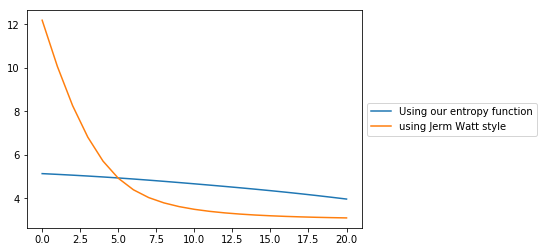

In [205]:
g = entropy
w = 0.00001 * np.random.rand(14, 7)
learning_rate = 10**(-11)
max_its = 20

weight_history1, cost_history1 = gradient_descent(entropy, learning_rate, max_its, w)
weight_history2, cost_history2 = gradient_descent(cross_entropy, learning_rate, max_its, w)

plot_cost_histories(cost_histories=[cost_history1, cost_history2], 
                    labels=["Using our entropy function", "using Jerm Watt style"])


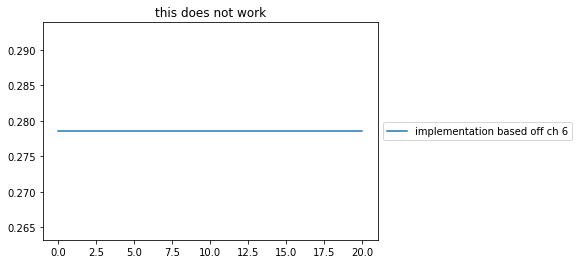

In [220]:
w = 0.001 * np.random.rand(14, 7)
learning_rate = 10**(-5)
max_its = 20

weight_history3, cost_history3 = gradient_descent(cross_entropy2, learning_rate, max_its, w)

plot_cost_histories(cost_histories=[cost_history3], 
                    labels=["implementation based off ch 6"], title = "this does not work")


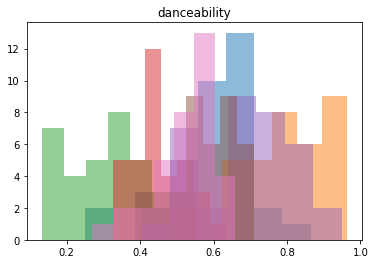

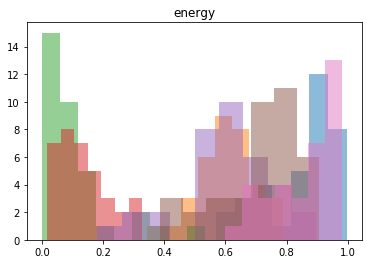

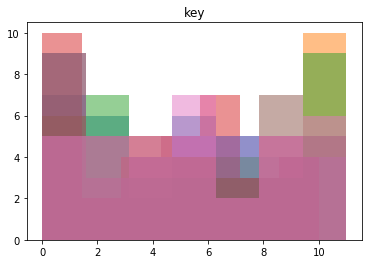

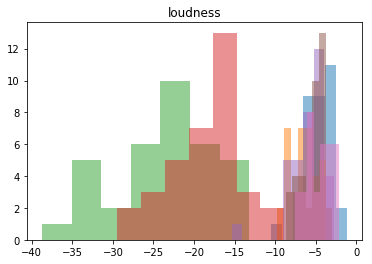

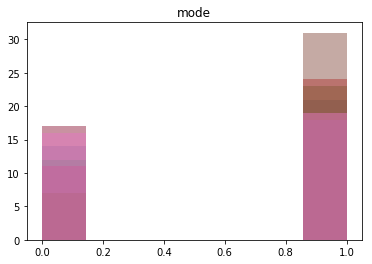

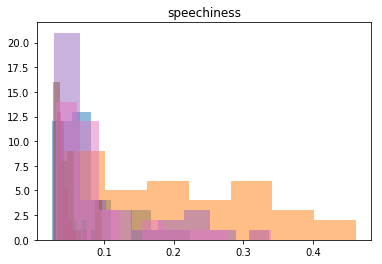

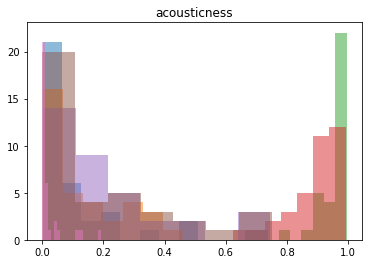

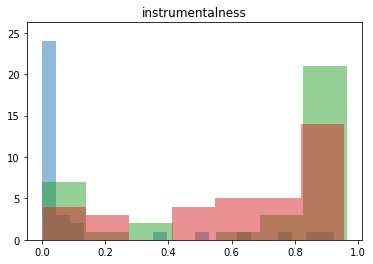

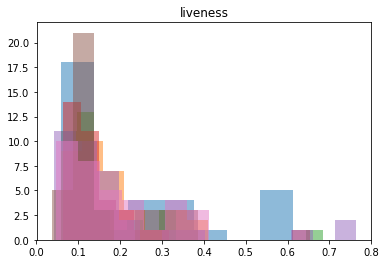

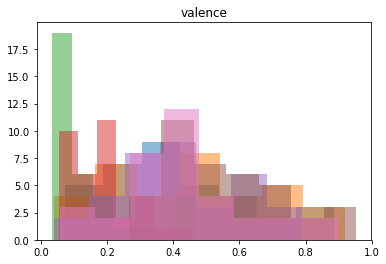

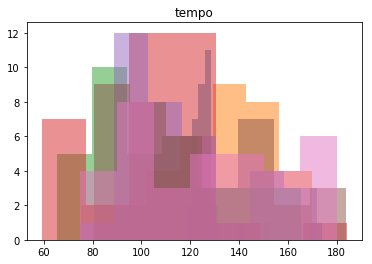

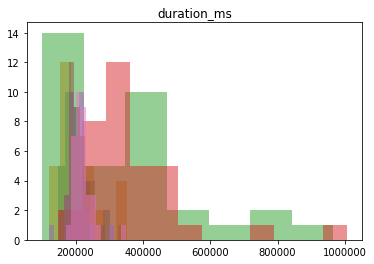

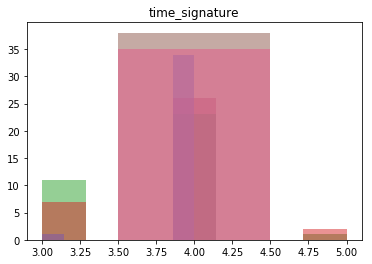

In [267]:
def draw_feature_histograms():    
    classes_data = []
    classes = len(np.unique(y))
    # secure data for each class
    for index in range(classes):
        ind = np.argwhere(y_encoded[:, index] == 1) # look up that one classification
        ind = np.concatenate(ind).ravel() # flatten the list
        
        class_data = x[ind]
        classes_data.append(class_data)
    # go through each feature
    for feature_index in range(len(attribute_names)):
        # for each class
        for index in range(classes):
            plt.hist(classes_data[index][:, feature_index], bins="auto", alpha = 0.5)
        plt.title(attribute_names[feature_index])
        plt.show()
draw_feature_histograms()

[0.703 0.705 0.625 0.601 0.784 0.584 0.626 0.695 0.675 0.603 0.588 0.562
 0.677 0.699 0.701 0.653 0.25  0.507 0.538 0.542 0.706 0.497 0.691 0.59
 0.864 0.636 0.634 0.479 0.285 0.717 0.679 0.599 0.422 0.621 0.517]


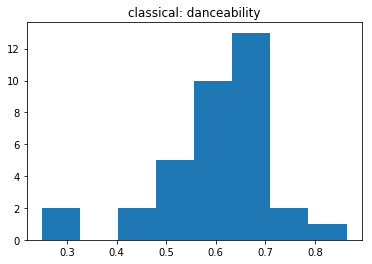

[0.825 0.754 0.736 0.8   0.853 0.755 0.901 0.699 0.917 0.785 0.95  0.91
 0.909 0.487 0.962 0.794 0.665 0.674 0.52  0.855 0.85  0.95  0.68  0.759
 0.671 0.885 0.79  0.827 0.733 0.92  0.781 0.901 0.83  0.688 0.794]


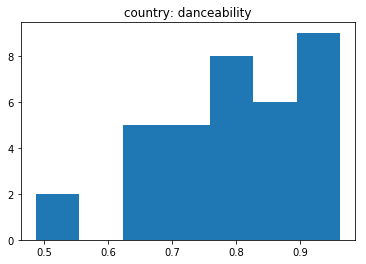

[0.361 0.178 0.426 0.19  0.545 0.416 0.191 0.447 0.456 0.552 0.505 0.34
 0.296 0.174 0.195 0.262 0.293 0.356 0.345 0.26  0.418 0.362 0.175 0.393
 0.208 0.282 0.471 0.226 0.366 0.431 0.217 0.366 0.159 0.133 0.317]


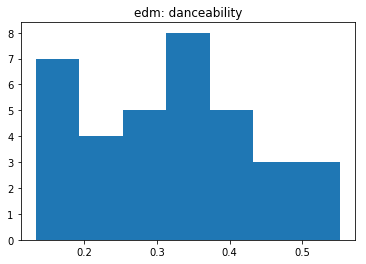

[0.505 0.55  0.47  0.447 0.421 0.446 0.326 0.526 0.445 0.445 0.533 0.383
 0.484 0.388 0.569 0.364 0.539 0.42  0.428 0.386 0.42  0.428 0.399 0.336
 0.368 0.52  0.423 0.45  0.421 0.331 0.575 0.461 0.633 0.411 0.458]


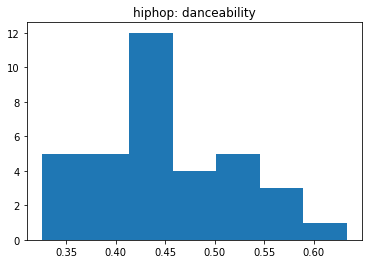

[0.841 0.404 0.817 0.704 0.531 0.694 0.575 0.669 0.834 0.755 0.719 0.95
 0.755 0.687 0.657 0.575 0.739 0.669 0.499 0.826 0.499 0.703 0.547 0.89
 0.82  0.703 0.8   0.553 0.754 0.55  0.652 0.738 0.553 0.765 0.746]


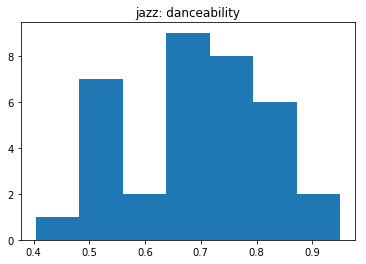

[0.539 0.652 0.559 0.609 0.687 0.471 0.517 0.432 0.533 0.552 0.688 0.552
 0.623 0.644 0.697 0.697 0.655 0.641 0.487 0.552 0.386 0.628 0.628 0.51
 0.563 0.629 0.423 0.609 0.705 0.543 0.631 0.612 0.549 0.575 0.711 0.434
 0.609 0.615]


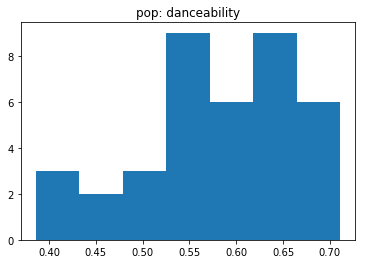

[0.571 0.547 0.565 0.451 0.579 0.586 0.512 0.55  0.27  0.526 0.568 0.343
 0.601 0.621 0.658 0.479 0.57  0.579 0.626 0.391 0.518 0.568 0.338 0.56
 0.619 0.528 0.526 0.525 0.437 0.514 0.552 0.4   0.482 0.577 0.442]


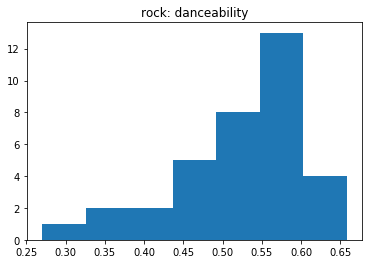

[0.832 0.937 0.576 0.99  0.913 0.959 0.755 0.848 0.888 0.882 0.697 0.871
 0.848 0.94  0.933 0.946 0.909 0.887 0.904 0.996 0.882 0.925 0.924 0.678
 0.743 0.908 0.632 0.919 0.694 0.752 0.985 0.57  0.677 0.842 0.981]


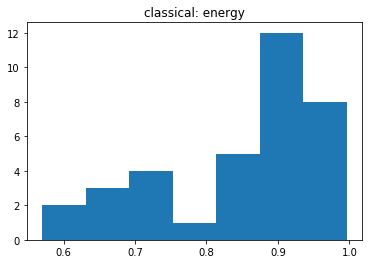

[0.572 0.342 0.482 0.578 0.696 0.615 0.464 0.558 0.786 0.554 0.59  0.661
 0.405 0.789 0.573 0.598 0.651 0.566 0.538 0.694 0.785 0.489 0.732 0.73
 0.565 0.543 0.629 0.623 0.63  0.606 0.676 0.522 0.593 0.642 0.637]


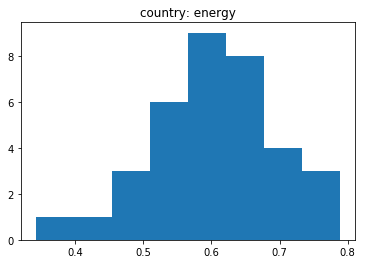

[0.0732   0.0233   0.41     0.0395   0.0796   0.327    0.146    0.000653
 0.217    0.124    0.532    0.0739   0.0743   0.0201   0.0139   0.113
 0.0664   0.304    0.0366   0.0458   0.0226   0.14     0.0656   0.0402
 0.016    0.0228   0.176    0.0884   0.158    0.0773   0.0563   0.0526
 0.00299  0.0133   0.0963  ]


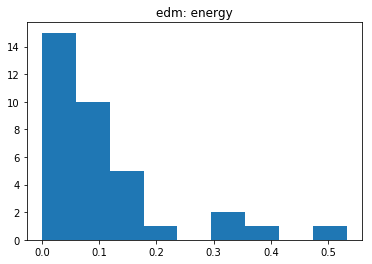

[0.159  0.249  0.156  0.163  0.0161 0.242  0.0575 0.17   0.223  0.0978
 0.148  0.131  0.0291 0.0354 0.117  0.114  0.0678 0.105  0.212  0.125
 0.0802 0.3    0.307  0.328  0.14   0.0748 0.158  0.0437 0.0967 0.0861
 0.0935 0.0389 0.12   0.0416 0.217 ]


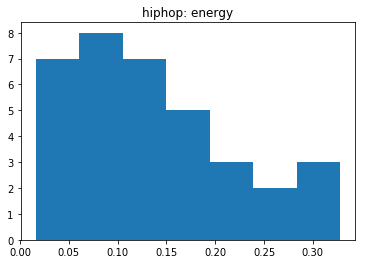

[0.798 0.531 0.539 0.56  0.854 0.63  0.33  0.684 0.73  0.625 0.703 0.59
 0.615 0.792 0.569 0.571 0.742 0.574 0.638 0.615 0.181 0.66  0.289 0.624
 0.582 0.748 0.578 0.502 0.342 0.415 0.897 0.629 0.586 0.704 0.703]


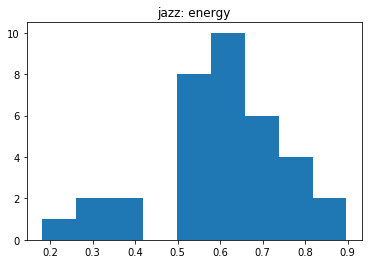

[0.859 0.712 0.754 0.807 0.75  0.791 0.776 0.796 0.907 0.698 0.757 0.573
 0.828 0.713 0.82  0.531 0.56  0.84  0.859 0.402 0.799 0.708 0.757 0.386
 0.745 0.464 0.813 0.68  0.761 0.88  0.44  0.671 0.869 0.571 0.696 0.831
 0.814 0.68 ]


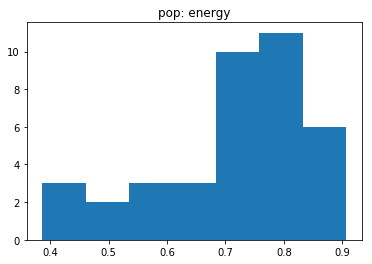

[0.677 0.944 0.85  0.865 0.778 0.951 0.884 0.936 0.931 0.817 0.916 0.91
 0.676 0.972 0.599 0.727 0.723 0.904 0.7   0.8   0.713 0.907 0.806 0.885
 0.696 0.976 0.98  0.957 0.934 0.956 0.935 0.792 0.946 0.936 0.897]


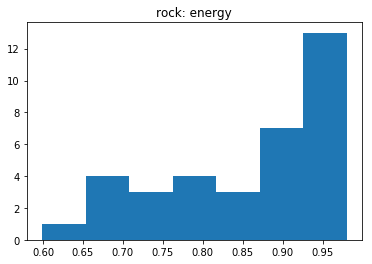

[ 0.  3.  8.  6.  1.  9.  6.  3.  3.  2.  3.  0.  7.  8.  7.  5.  4.  5.
 10.  4.  8.  2.  0. 10.  7.  0.  5.  0. 11.  0.  7. 10. 11.  5.  7.]


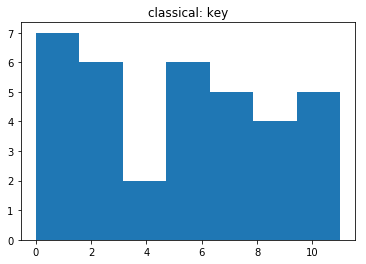

[ 6. 10.  4.  4.  1.  4.  5. 11. 11.  0.  8.  7.  6.  8.  7. 11.  1.  5.
  1.  2.  8.  8. 10.  0. 11.  2.  8.  4. 11.  1. 10.  2. 10.  4. 11.]


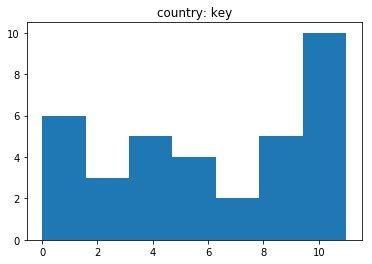

[ 7.  2.  2. 10.  0.  0. 11.  7.  2.  0.  3. 11.  8.  0.  5.  4. 10.  7.
  4. 11.  8. 10. 10.  7.  5.  8.  2. 10. 11.  4.  1.  2.  3.  6.  0.]


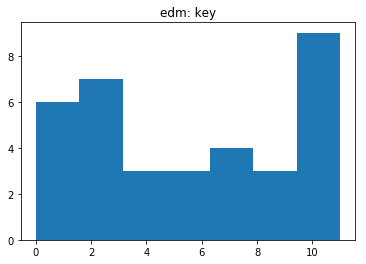

[ 7.  5.  2.  8.  2.  8.  4.  9.  3.  3.  0.  7. 10.  7.  5.  1.  0.  6.
  0.  9.  7.  0.  1.  7.  0.  8.  0. 10.  7.  5.  3.  0.  5.  1.  5.]


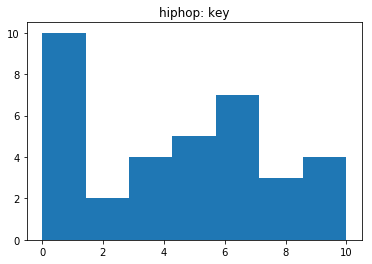

[ 1.  1.  6.  1. 10.  7.  7.  7.  8.  2.  5.  8.  4.  5.  2.  1.  7.  4.
  0.  8.  9. 10.  0.  1.  2.  1.  4.  0. 10.  9.  7.  6. 11.  5.  4.]


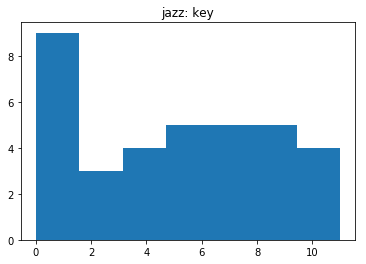

[ 7.  4.  6.  5. 11.  0. 11.  4. 11.  8.  1.  9.  3.  9.  1.  2.  9.  0.
  4. 11.  2. 11.  7.  1.  2.  4.  9.  9.  0.  3.  1.  6.  4.  1.  7.  8.
  0.  6.]


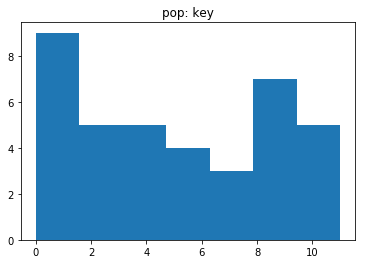

[ 2.  4. 11. 11.  8.  6.  6.  8.  1.  4.  6.  8.  9.  7.  6.  4.  0.  5.
  4.  2. 10.  5.  9.  2.  7.  2.  1.  0.  6. 11.  0. 11.  4. 11.  2.]


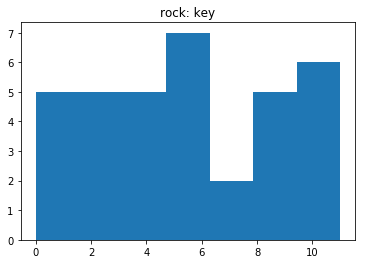

[ -7.202  -3.868  -5.812  -3.016  -1.208  -1.785 -10.491  -6.068  -3.473
  -3.13   -4.744  -4.788  -6.14   -5.969  -5.35   -3.757  -5.407  -4.084
  -4.58   -3.124  -4.209  -4.489  -3.839  -5.48   -6.431  -3.01   -4.52
  -3.443  -3.358  -6.933  -3.357  -7.531  -5.76   -4.886  -3.542]


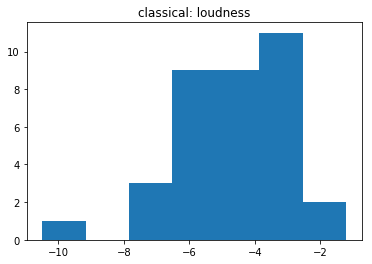

[-6.067 -8.677 -8.242 -5.144 -6.179 -8.245 -9.789 -7.622 -4.921 -6.571
 -6.508 -6.999 -8.133 -3.69  -5.924 -5.042 -5.515 -9.07  -8.109 -4.393
 -4.963 -8.411 -7.108 -7.985 -7.401 -6.338 -4.055 -6.199 -4.296 -5.779
 -3.857 -8.304 -6.57  -5.567 -6.373]


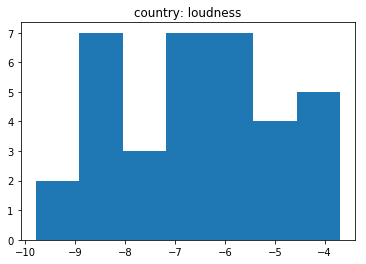

[-18.459 -31.93  -13.994 -24.322 -22.296 -15.328 -21.527 -31.998 -16.943
 -16.426 -13.769 -19.376 -23.038 -34.186 -34.008 -21.431 -18.765 -13.199
 -28.152 -22.942 -28.346 -23.129 -22.5   -25.24  -26.874 -23.671 -18.587
 -19.227 -22.576 -24.812 -26.45  -23.922 -38.709 -33.662 -24.798]


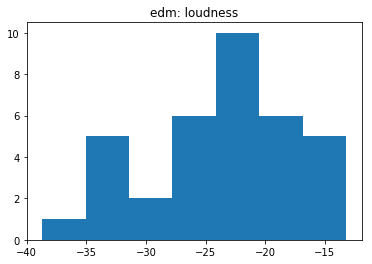

[-11.235 -15.919 -17.036 -14.835 -25.358 -14.152 -16.5   -13.089 -17.402
 -26.924 -18.275 -17.764 -23.363 -25.766 -22.741 -16.552 -18.039 -20.502
 -15.442 -19.892 -21.795  -8.885 -14.38  -15.005 -15.005 -24.477 -15.59
 -29.46  -16.441 -21.226 -15.906 -20.482 -20.066 -23.23  -16.582]


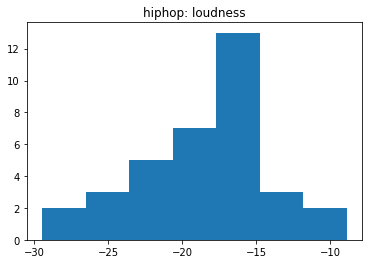

[ -4.206  -4.328  -6.349  -6.791  -3.149  -6.84   -6.557  -4.595  -3.714
  -7.114  -4.93   -6.508  -8.245  -2.749  -6.287  -7.906  -4.586  -6.442
  -6.145  -7.979 -15.359  -5.119  -8.131  -3.966  -4.441  -6.047  -5.144
  -5.972  -8.677  -6.557  -4.481  -4.882  -6.319  -4.589  -4.179]


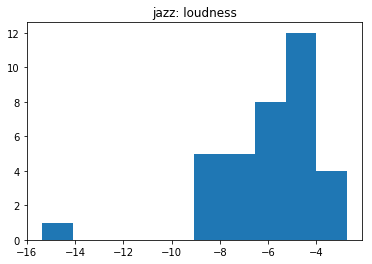

[-4.465 -4.588 -5.344 -7.221 -4.537 -4.817 -5.271 -2.952 -3.793 -4.817
 -5.202 -6.585 -4.272 -7.148 -4.275 -7.141 -6.857 -6.044 -4.403 -7.431
 -3.789 -7.045 -3.561 -8.391 -4.753 -8.72  -5.011 -6.316 -4.579 -4.204
 -5.948 -4.448 -4.905 -7.906 -5.05  -4.774 -4.263 -4.582]


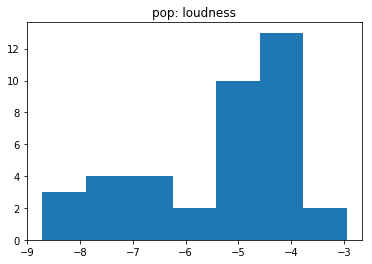

[-4.718 -3.304 -4.256 -4.219 -5.933 -3.022 -5.659 -2.876 -5.016 -7.589
 -5.327 -5.734 -4.423 -2.245 -7.488 -5.369 -6.673 -2.729 -5.437 -2.761
 -6.031 -4.641 -7.417 -5.631 -6.269 -2.188 -3.042 -3.742 -3.227 -3.003
 -4.096 -4.118 -3.231 -2.924 -6.161]


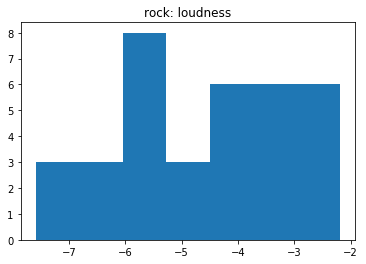

[0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


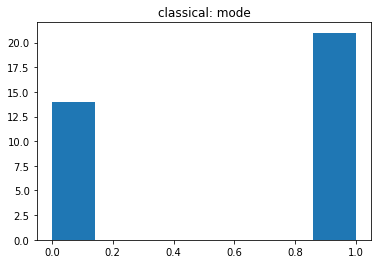

[0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]


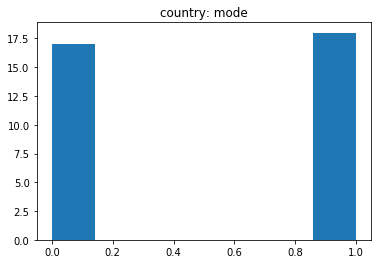

[1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]


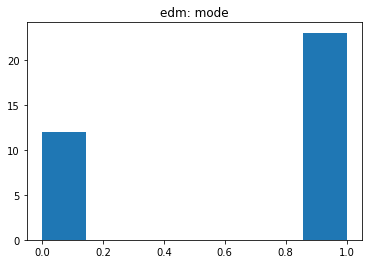

[0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.]


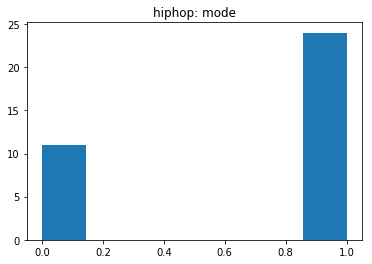

[0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]


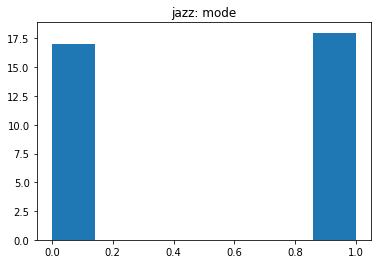

[1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.]


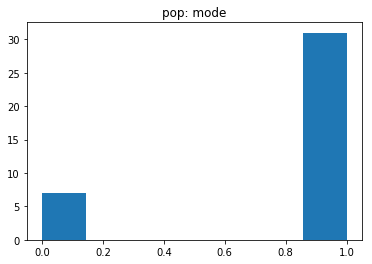

[0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.]


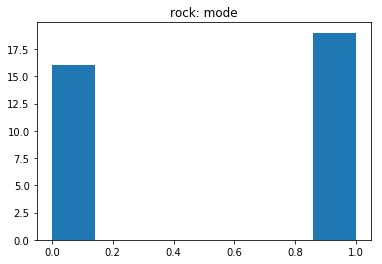

[0.0689 0.0963 0.036  0.337  0.177  0.0942 0.0337 0.0506 0.0967 0.0338
 0.0372 0.0646 0.0741 0.208  0.0407 0.0556 0.0414 0.141  0.0551 0.0623
 0.0637 0.0745 0.0577 0.0384 0.0889 0.0591 0.0313 0.153  0.0482 0.065
 0.0617 0.0248 0.0365 0.158  0.0761]


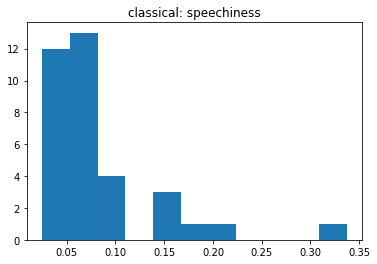

[0.0864 0.0991 0.196  0.0485 0.246  0.0454 0.0645 0.0603 0.208  0.0409
 0.29   0.122  0.14   0.044  0.308  0.3    0.156  0.408  0.206  0.169
 0.345  0.462  0.27   0.0516 0.16   0.2    0.142  0.35   0.395  0.169
 0.26   0.33   0.309  0.321  0.267 ]


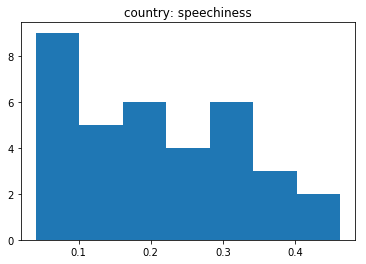

[0.038  0.0491 0.0432 0.0536 0.045  0.0497 0.0581 0.0883 0.0561 0.0703
 0.0698 0.0628 0.0522 0.0499 0.0433 0.0506 0.0536 0.0415 0.0362 0.0436
 0.0349 0.0374 0.0461 0.0439 0.0393 0.0361 0.0489 0.0402 0.0385 0.0382
 0.0406 0.0366 0.0478 0.0431 0.0488]


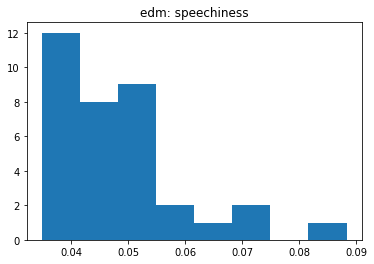

[0.0336 0.0325 0.0399 0.0707 0.0374 0.0368 0.0393 0.0411 0.0374 0.0397
 0.0329 0.033  0.0459 0.0421 0.0446 0.0333 0.0468 0.035  0.032  0.0572
 0.04   0.034  0.0347 0.0386 0.045  0.0497 0.0346 0.0374 0.0509 0.0354
 0.0858 0.0399 0.0428 0.0414 0.0328]


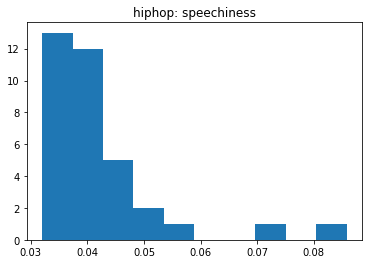

[0.229  0.103  0.0621 0.179  0.198  0.162  0.031  0.0585 0.222  0.0896
 0.0392 0.29   0.0454 0.0452 0.0542 0.0439 0.0329 0.0286 0.0438 0.219
 0.0429 0.123  0.0348 0.103  0.0454 0.0435 0.0485 0.0409 0.0991 0.052
 0.036  0.0495 0.0362 0.127  0.107 ]


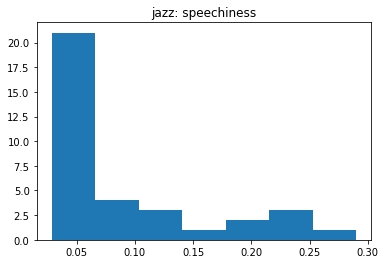

[0.0399 0.0388 0.0481 0.0972 0.0965 0.0506 0.0362 0.049  0.0406 0.0306
 0.0612 0.0948 0.0565 0.0547 0.0448 0.0268 0.0486 0.0279 0.0488 0.0262
 0.0555 0.0287 0.0281 0.0307 0.0288 0.0334 0.0507 0.0348 0.0298 0.0365
 0.028  0.0276 0.0289 0.0439 0.0871 0.0453 0.0382 0.0286]


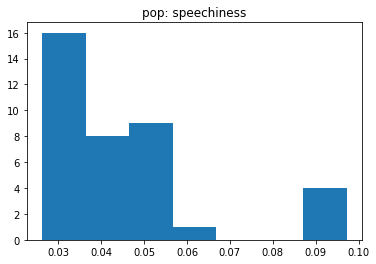

[0.0373 0.0507 0.0366 0.044  0.164  0.209  0.168  0.078  0.232  0.0851
 0.0943 0.0648 0.0926 0.05   0.0367 0.0357 0.0386 0.0618 0.0305 0.0523
 0.0815 0.0488 0.0767 0.0363 0.0315 0.0803 0.34   0.0689 0.0915 0.271
 0.0623 0.0368 0.0853 0.078  0.11  ]


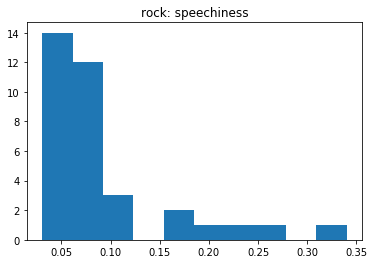

[0.00149 0.0362  0.217   0.00116 0.0114  0.00272 0.14    0.00916 0.124
 0.0494  0.186   0.341   0.0154  0.0853  0.121   0.00812 0.00909 0.00731
 0.00168 0.0172  0.0777  0.00523 0.00828 0.0259  0.00504 0.0324  0.0129
 0.116   0.511   0.251   0.102   0.0273  0.251   0.492   0.00112]


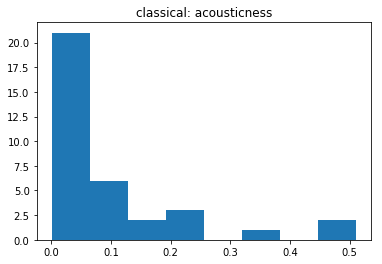

[0.0079  0.073   0.327   0.00381 0.179   0.00587 0.368   0.462   0.0403
 0.283   0.00534 0.325   0.0306  0.00947 0.0161  0.0952  0.0414  0.161
 0.367   0.371   0.0367  0.105   0.235   0.145   0.274   0.0311  0.182
 0.0193  0.13    0.0204  0.0563  0.0114  0.0594  0.221   0.11   ]


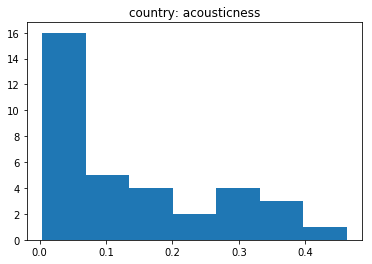

[0.913 0.663 0.936 0.995 0.991 0.723 0.985 0.882 0.944 0.992 0.919 0.982
 0.911 0.989 0.792 0.978 0.994 0.911 0.993 0.899 0.992 0.984 0.978 0.994
 0.971 0.994 0.994 0.978 0.994 0.957 0.988 0.95  0.971 0.976 0.966]


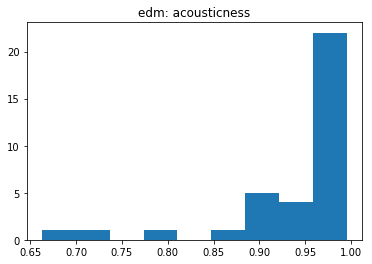

[0.946 0.929 0.623 0.992 0.81  0.87  0.99  0.823 0.921 0.965 0.924 0.761
 0.961 0.986 0.846 0.857 0.967 0.868 0.971 0.886 0.905 0.937 0.912 0.93
 0.901 0.748 0.717 0.971 0.91  0.918 0.978 0.899 0.971 0.96  0.827]


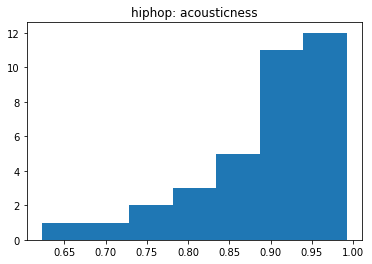

[0.153   0.215   0.0141  0.185   0.288   0.0998  0.416   0.252   0.00513
 0.49    0.032   0.00534 0.00587 0.191   0.201   0.0558  0.0227  0.0175
 0.129   0.071   0.745   0.137   0.645   0.0944  0.428   0.123   0.00381
 0.299   0.073   0.161   0.293   0.268   0.697   0.0215  0.352  ]


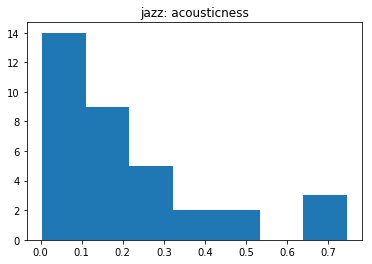

[3.17e-02 5.96e-01 1.84e-03 4.03e-03 1.07e-01 8.36e-02 1.44e-02 4.86e-01
 2.92e-02 2.94e-01 5.23e-02 4.63e-02 1.62e-01 1.44e-02 9.28e-03 2.51e-01
 7.49e-01 1.71e-04 2.04e-03 6.76e-01 2.01e-01 3.09e-01 1.13e-01 4.56e-01
 2.40e-01 7.50e-01 2.18e-01 8.86e-02 3.85e-03 3.50e-02 3.28e-01 3.97e-01
 2.61e-03 5.58e-02 1.60e-01 6.51e-02 2.26e-02 3.64e-01]


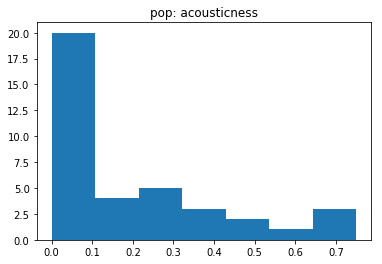

[2.31e-02 4.81e-05 5.55e-03 1.03e-02 1.58e-02 4.61e-03 1.60e-03 2.07e-04
 1.39e-02 5.52e-02 1.15e-01 1.36e-03 4.14e-03 1.77e-02 1.24e-01 7.18e-04
 2.38e-03 1.93e-01 1.49e-03 9.77e-03 4.17e-03 1.15e-03 3.43e-03 4.70e-02
 1.89e-05 1.08e-04 1.74e-05 2.02e-03 1.66e-03 1.34e-03 1.74e-02 4.49e-04
 2.51e-03 4.30e-02 1.27e-01]


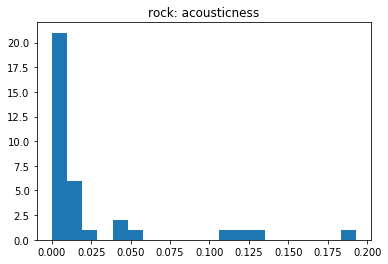

[1.27e-01 2.71e-04 2.85e-06 5.20e-01 1.62e-03 0.00e+00 3.86e-01 1.09e-01
 2.48e-02 1.32e-02 2.19e-04 1.47e-06 1.11e-03 0.00e+00 9.24e-01 2.07e-04
 8.48e-01 0.00e+00 6.37e-01 7.77e-02 1.69e-02 7.81e-01 3.80e-06 2.20e-05
 7.08e-02 3.09e-03 4.53e-04 1.39e-04 1.28e-04 4.68e-04 1.07e-02 3.16e-04
 3.55e-06 0.00e+00 4.56e-02]


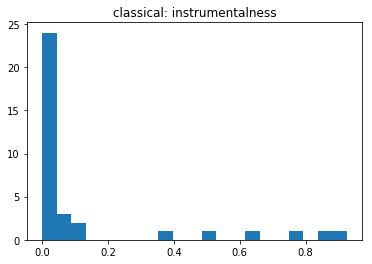

[0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.75e-06 1.71e-05 0.00e+00
 0.00e+00 3.40e-06 0.00e+00 1.14e-04 6.98e-03 4.05e-06 0.00e+00 0.00e+00
 0.00e+00 9.42e-06 1.87e-03 0.00e+00 0.00e+00 0.00e+00 1.74e-04 3.06e-06
 6.51e-05 0.00e+00 7.06e-06 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00]


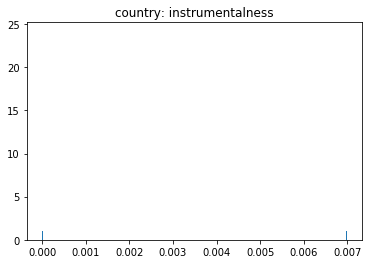

[9.07e-01 9.07e-02 9.33e-01 3.18e-01 8.41e-01 5.91e-01 1.47e-04 8.08e-02
 8.91e-01 8.70e-01 8.41e-01 6.04e-03 8.16e-01 8.63e-02 1.40e-03 8.55e-01
 1.80e-01 3.38e-01 9.37e-01 3.13e-02 9.08e-01 9.23e-01 9.33e-01 8.88e-01
 8.52e-01 8.51e-01 9.21e-01 8.94e-01 8.86e-01 8.12e-01 8.95e-01 9.05e-01
 9.64e-01 8.96e-01 7.48e-01]


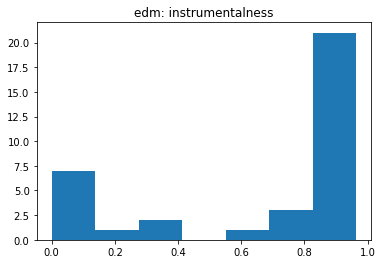

[0.0127 0.828  0.187  0.776  0.0021 0.497  0.887  0.777  0.884  0.915
 0.932  0.194  0.474  0.956  0.852  0.635  0.168  0.587  0.73   0.878
 0.857  0.658  0.623  0.732  0.874  0.633  0.0075 0.88   0.415  0.902
 0.452  0.015  0.871  0.925  0.805 ]


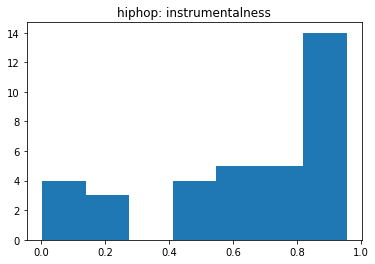

[3.33e-06 0.00e+00 4.96e-04 0.00e+00 0.00e+00 6.35e-04 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.14e-05 0.00e+00 1.75e-06 0.00e+00 1.38e-05 0.00e+00
 1.39e-06 2.94e-03 0.00e+00 0.00e+00 1.23e-03 0.00e+00 0.00e+00 5.16e-06
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.14e-03
 0.00e+00 0.00e+00 0.00e+00]


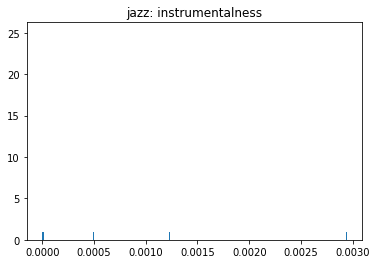

[0.00e+00 0.00e+00 4.62e-04 5.42e-06 3.05e-06 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 1.03e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.18e-04 1.25e-04
 0.00e+00 1.79e-03 0.00e+00 0.00e+00 0.00e+00 1.32e-06 0.00e+00 0.00e+00
 4.96e-05 0.00e+00 1.62e-06 0.00e+00 0.00e+00 2.27e-04 0.00e+00 1.19e-06
 1.77e-06 0.00e+00 0.00e+00 0.00e+00 1.14e-06 1.75e-06]


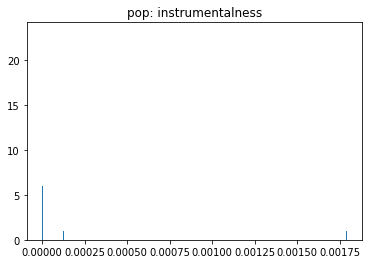

[0.00e+00 4.51e-02 4.35e-05 3.16e-02 0.00e+00 0.00e+00 2.15e-03 2.67e-06
 0.00e+00 7.25e-05 4.64e-04 5.67e-05 0.00e+00 1.50e-03 0.00e+00 1.97e-05
 1.44e-04 0.00e+00 1.08e-03 3.08e-06 7.68e-03 0.00e+00 0.00e+00 3.47e-06
 5.55e-03 0.00e+00 1.36e-03 3.25e-06 0.00e+00 2.43e-02 1.98e-06 8.48e-02
 0.00e+00 1.74e-05 0.00e+00]


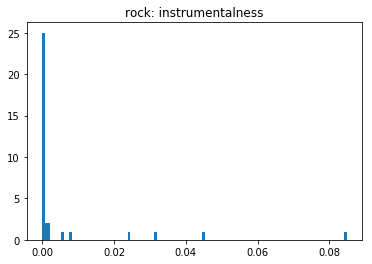

[0.0696 0.178  0.0897 0.124  0.0831 0.553  0.0938 0.12   0.076  0.241
 0.103  0.351  0.277  0.336  0.0842 0.126  0.136  0.562  0.538  0.614
 0.61   0.222  0.402  0.0707 0.059  0.0883 0.116  0.152  0.374  0.0802
 0.33   0.116  0.16   0.27   0.0947]


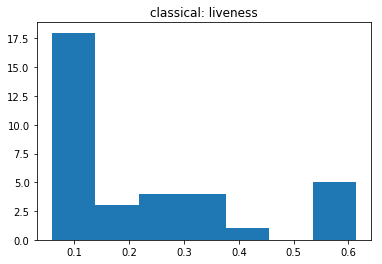

[0.113  0.193  0.229  0.359  0.286  0.109  0.238  0.116  0.195  0.116
 0.11   0.149  0.105  0.189  0.109  0.166  0.0896 0.349  0.119  0.109
 0.155  0.411  0.0705 0.11   0.37   0.154  0.338  0.0589 0.162  0.107
 0.119  0.259  0.101  0.2    0.185 ]


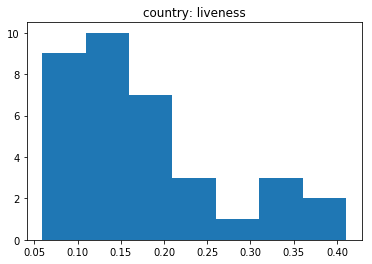

[0.0589 0.0676 0.151  0.106  0.112  0.289  0.0881 0.0794 0.163  0.121
 0.298  0.0993 0.236  0.0987 0.304  0.0929 0.0803 0.684  0.126  0.302
 0.125  0.0984 0.0931 0.0898 0.101  0.109  0.146  0.137  0.105  0.187
 0.119  0.0977 0.07   0.0719 0.226 ]


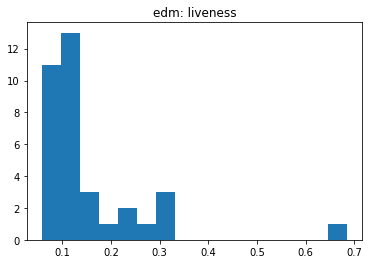

[0.212  0.258  0.104  0.654  0.0978 0.105  0.281  0.114  0.131  0.121
 0.112  0.0973 0.115  0.178  0.0978 0.0839 0.114  0.0957 0.169  0.189
 0.135  0.168  0.115  0.111  0.0688 0.102  0.0975 0.0948 0.218  0.106
 0.109  0.0927 0.121  0.064  0.194 ]


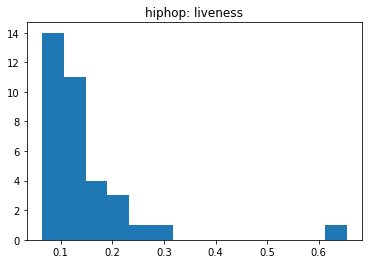

[0.0618 0.0521 0.099  0.0948 0.0773 0.12   0.0872 0.72   0.124  0.157
 0.0656 0.11   0.109  0.167  0.126  0.0912 0.229  0.146  0.631  0.0965
 0.106  0.192  0.148  0.0903 0.0419 0.0642 0.359  0.764  0.193  0.108
 0.0722 0.163  0.0813 0.227  0.331 ]


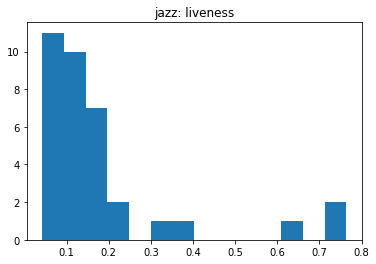

[0.102  0.0814 0.0366 0.0926 0.161  0.0868 0.113  0.355  0.386  0.0905
 0.0902 0.105  0.0976 0.0829 0.122  0.0954 0.115  0.109  0.322  0.0928
 0.103  0.109  0.263  0.252  0.11   0.0853 0.0732 0.108  0.186  0.304
 0.239  0.0984 0.29   0.0912 0.17   0.119  0.382  0.115 ]


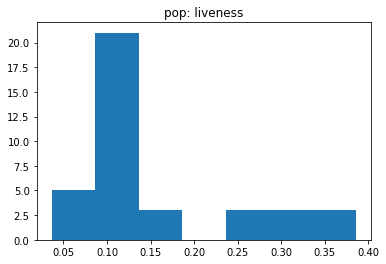

[0.352  0.195  0.113  0.232  0.101  0.0767 0.0763 0.302  0.218  0.123
 0.0779 0.0717 0.186  0.0692 0.124  0.0644 0.2    0.064  0.17   0.329
 0.103  0.0982 0.144  0.361  0.38   0.24   0.208  0.333  0.317  0.0627
 0.116  0.185  0.0466 0.413  0.0993]


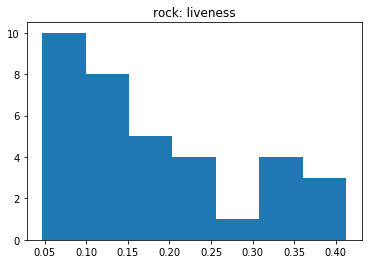

[0.667  0.786  0.297  0.192  0.59   0.0729 0.372  0.797  0.439  0.507
 0.225  0.351  0.469  0.652  0.726  0.653  0.322  0.336  0.0731 0.263
 0.215  0.262  0.34   0.4    0.887  0.353  0.449  0.388  0.163  0.14
 0.462  0.299  0.146  0.55   0.386 ]


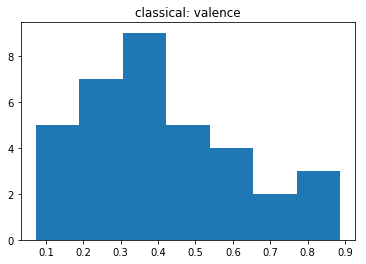

[0.568  0.423  0.608  0.367  0.184  0.039  0.638  0.493  0.441  0.144
 0.219  0.763  0.455  0.0564 0.728  0.184  0.237  0.752  0.177  0.49
 0.718  0.919  0.864  0.74   0.561  0.43   0.267  0.357  0.832  0.142
 0.535  0.329  0.209  0.341  0.503 ]


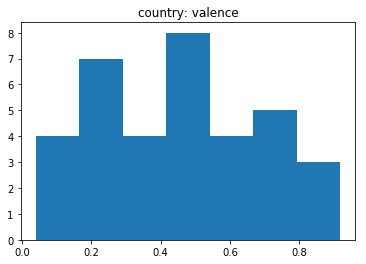

[0.162  0.0343 0.466  0.117  0.305  0.41   0.0639 0.108  0.0378 0.0759
 0.158  0.0461 0.149  0.0361 0.0348 0.132  0.23   0.146  0.171  0.0721
 0.0711 0.45   0.0457 0.0628 0.0644 0.0501 0.133  0.0827 0.419  0.0624
 0.037  0.195  0.033  0.0505 0.075 ]


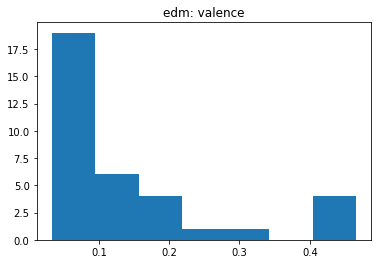

[0.196  0.296  0.059  0.197  0.16   0.171  0.301  0.18   0.225  0.173
 0.108  0.101  0.379  0.198  0.101  0.0575 0.263  0.0985 0.314  0.14
 0.0541 0.235  0.0659 0.222  0.172  0.122  0.185  0.0988 0.183  0.152
 0.301  0.125  0.456  0.0782 0.128 ]


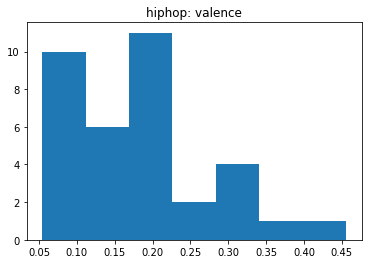

[0.591  0.321  0.158  0.609  0.456  0.341  0.277  0.466  0.446  0.374
 0.72   0.219  0.039  0.671  0.399  0.449  0.659  0.273  0.253  0.543
 0.0747 0.79   0.213  0.762  0.309  0.625  0.367  0.296  0.423  0.274
 0.475  0.319  0.443  0.498  0.667 ]


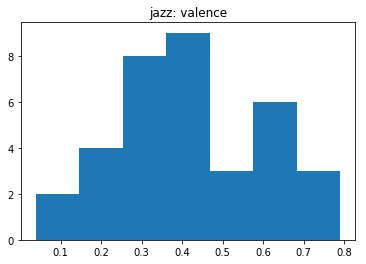

[0.456 0.553 0.438 0.492 0.911 0.355 0.448 0.563 0.7   0.6   0.941 0.525
 0.953 0.468 0.815 0.631 0.599 0.545 0.377 0.382 0.391 0.276 0.727 0.266
 0.28  0.523 0.421 0.561 0.819 0.483 0.418 0.7   0.433 0.449 0.694 0.596
 0.385 0.702]


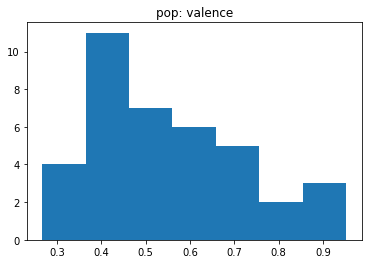

[0.134  0.364  0.26   0.461  0.467  0.471  0.649  0.767  0.446  0.558
 0.52   0.15   0.391  0.802  0.485  0.0577 0.44   0.681  0.362  0.398
 0.302  0.337  0.278  0.312  0.727  0.511  0.45   0.456  0.431  0.436
 0.38   0.338  0.287  0.899  0.174 ]


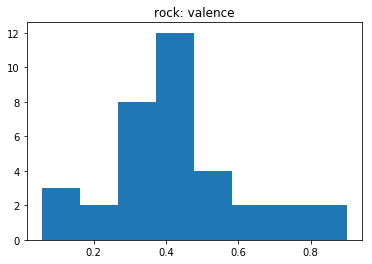

[122.029 124.999 121.915 127.958 126.054 125.987 122.008 122.028 123.919
 120.996 125.157 130.043 125.068 122.079 123.992 125.966 128.025 128.015
 123.989 125.949 122.932 139.961 125.983 126.061 117.937 127.994 128.075
 127.001 170.124 123.97  124.953 129.994 150.131 119.761 174.074]


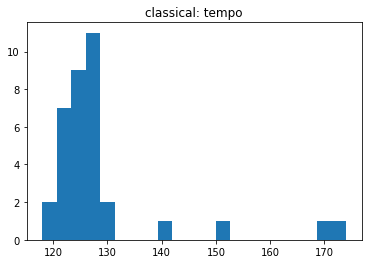

[141.991 128.981 140.064 143.01  118.001 105.955 109.004  79.992 143.038
 128.047 130.003 120.044 154.984 150.007 125.035  94.984 163.935 140.114
 141.894 122.078 145.063 130.021  75.422 115.007 150.014  99.026 170.023
 131.904 149.989 142.04  146.107 104.053 139.964 160.319 158.098]


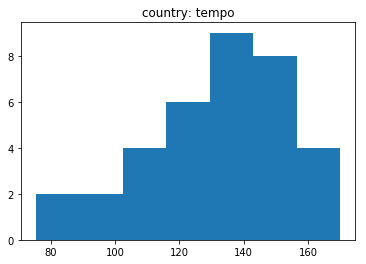

[105.47   91.34   88.033 165.01  103.116 131.454  79.8   165.545 123.82
 139.997 107.895 110.244 114.694 136.286 104.943  85.552  84.441 113.674
 137.465 117.38  114.017 154.35   91.262  68.804  88.351  76.472 105.425
  86.586  87.946  65.559 143.527  80.921  81.543  74.315 110.751]


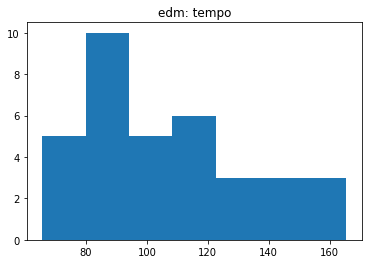

[ 59.385 121.37  118.176  74.933 110.926 126.681 127.397 117.414 110.821
 117.283  63.637  98.606  98.434 143.514  60.483 117.715 124.105  99.873
  98.096  78.553 122.041 122.667 116.308 184.007  61.758 107.327 106.974
  63.938  77.401 107.436  65.23  109.374 115.51   97.96  107.506]


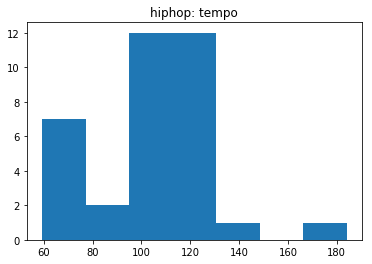

[ 95.948 164.848  97.062  75.003  94.419  90.045  95.801  96.097 155.008
 147.02  101.984 130.003 105.955 100.015 102.054 105.049 124.016 120.013
  89.98   98.056 111.956  95.031 104.851 116.046 112.064 111.943 143.01
 129.976 128.981 172.065 114.033 146.067 126.684 147.055 166.043]


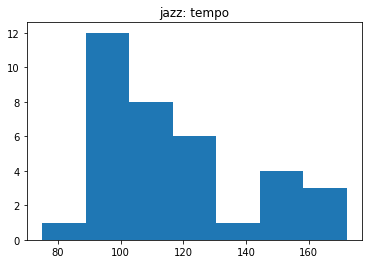

[ 89.937 120.063  85.993 119.073  98.987 128.007  96.002 183.935 150.99
  90.006 120.031 182.14   82.059  95.999  94.995  99.98  140.975 112.99
 148.037 103.313  86.333 111.047  96.016  86.36  121.015 156.051 173.995
 140.013  99.986 144.057 136.033 149.986  91.988 105.049  80.512 156.034
 126.006 149.992]


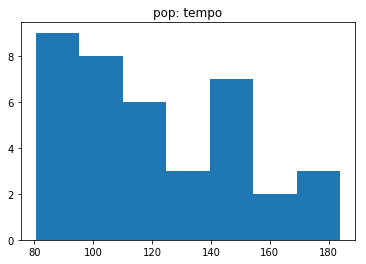

[128.008  93.966  92.01  172.153 166.006 130.009 154.019 158.02  124.608
  90.727 129.981 163.975 167.92  101.012  75.01  180.09  145.001  82.014
 101.016  83.81  140.137 112.037 160.821 102.003 125.986 100.082 110.011
  97.445 144.135 174.038  74.954 117.819 135.071 168.879 148.844]


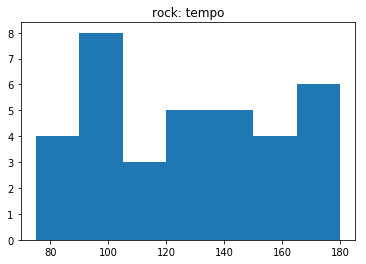

[196489. 195840. 218306. 148125. 199048. 172381. 347213. 181000. 180638.
 189493. 190417. 196615. 208096. 253770. 203347. 165714. 226875. 247505.
 181935. 190822. 202927. 207827. 158095. 178132. 166723. 166868. 210005.
 215488. 221294. 281267. 191160. 241500. 297782. 181000. 249341.]


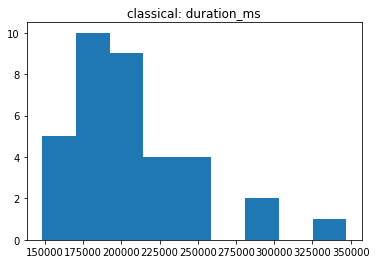

[175954. 121347. 224507. 204665. 171270. 215364. 203267. 165000. 224903.
 150043. 183527. 192000. 238613. 270715. 237655. 151649. 175755. 166087.
 345133. 324189. 343099. 158769. 230408. 268434. 210197. 195992. 169620.
 352977. 152000. 155493. 212133. 127947. 169704. 161129. 158987.]


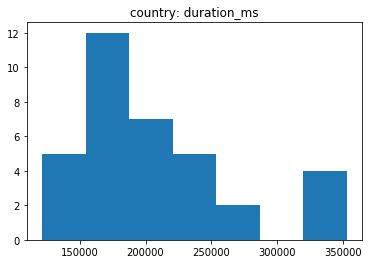

[417307. 354283. 233666. 147373. 359107. 178293. 203273. 652147. 410600.
 469307. 297880. 373413. 513280. 262253. 965467. 779213. 150027. 798760.
 172800. 215760. 200320. 476000. 245400. 133827. 137000. 257179. 101000.
 378645. 391133. 148533. 180907. 146454. 206147. 465000. 431280.]


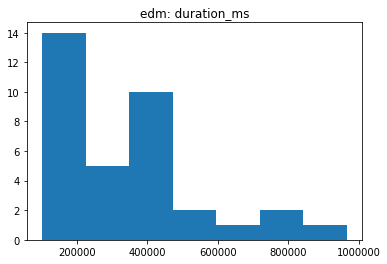

[ 295200.  484627.  394920. 1004627.  337733.  492080.  168667.  322133.
  391707.  396520.  221733.  447280.  389893.  232046.  282320.  317946.
  294667.  336373.  294587.  348533.  257693.  240093.  325587.  314493.
  428973.  341667.  335333.  289693.  763467.  507533.  258040.  477173.
  149072.  246067.  482187.]


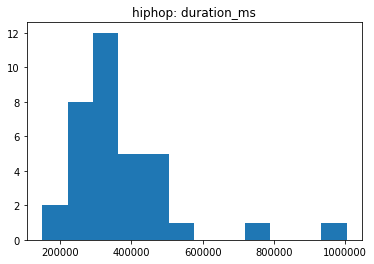

[212500. 214227. 210368. 207109. 190000. 189493. 217213. 192537. 312820.
 174861. 223000. 183527. 215364. 214290. 233880. 197947. 189000. 196400.
 239835. 225199. 214533. 198947. 181913. 169814. 214027. 184080. 204665.
 210200. 121347. 205463. 193377. 180898. 196373. 192172. 179693.]


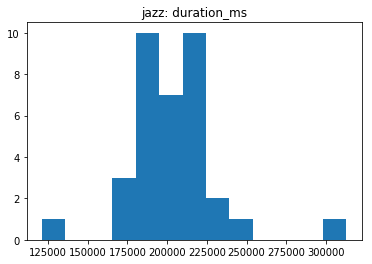

[186133. 202920. 188920. 238493. 172534. 213399. 216533. 212120. 183160.
 202067. 150893. 157422. 183140. 192840. 214096. 184640. 198440. 199640.
 228480. 193200. 213024. 288573. 172253. 199436. 225694. 195053. 211720.
 211547. 182133. 193067. 212745. 234293. 178733. 197947. 189533. 185440.
 205373. 234347.]


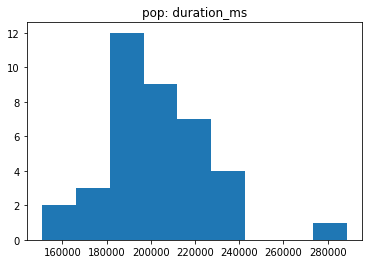

[190000. 203274. 185960. 211485. 193372. 231690. 216721. 204253. 213395.
 211187. 238148. 225732. 214186. 222200. 186238. 253249. 201957. 190947.
 222181. 210851. 229893. 230933. 219760. 196480. 219720. 261705. 217828.
 228373. 209109. 195250. 245787. 209049. 245861. 170453. 350520.]


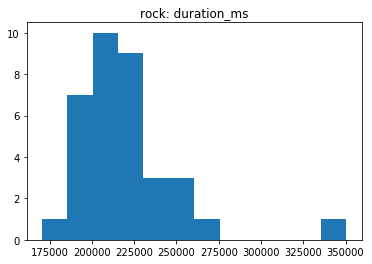

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


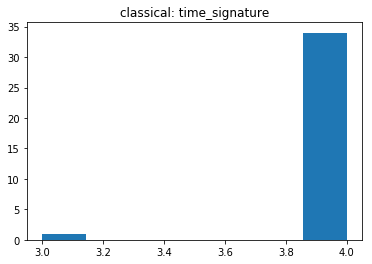

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


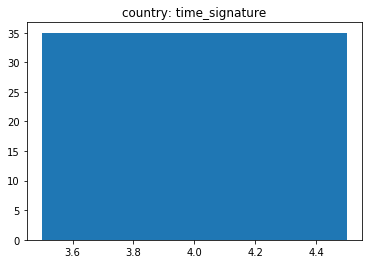

[4. 4. 4. 3. 4. 4. 3. 5. 4. 3. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 3. 3. 3. 4.
 4. 3. 3. 4. 4. 4. 3. 4. 3. 4. 4.]


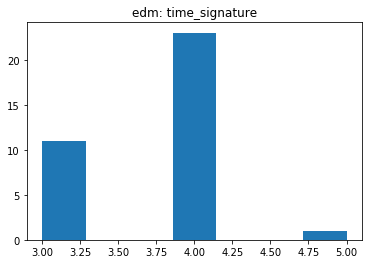

[4. 4. 4. 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 3. 3. 5. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4.]


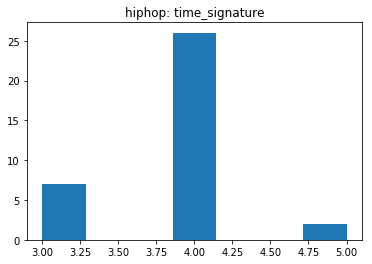

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


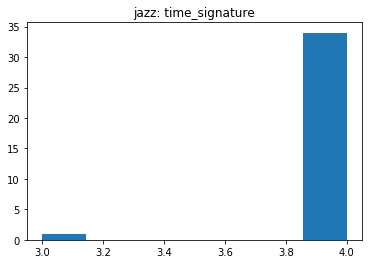

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


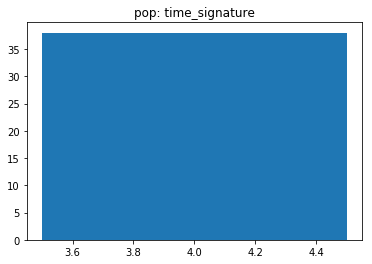

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


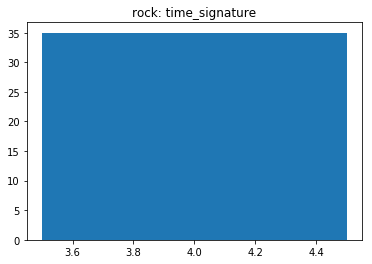

In [276]:
genres = np.unique(y)
def draw_feature_histograms_by_class():    
    classes_data = []
    classes = len(np.unique(y))
    # secure data for each class
    for index in range(classes):
        ind = np.argwhere(y_encoded[:, index] == 1) # look up that one classification
        ind = np.concatenate(ind).ravel() # flatten the list
        
        class_data = x[ind]
        classes_data.append(class_data)
    # go through each feature
    for feature_index in range(len(attribute_names)):
        # for each class
        for index in range(classes):
            print(classes_data[index][:, feature_index])
            plt.hist(classes_data[index][:, feature_index], bins="auto")
            title = genres[index] + ": " + attribute_names[feature_index]
            plt.title(title)
            plt.show()
draw_feature_histograms_by_class()